In [1]:
# Import das Bibliotecas:
import numpy as np
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from datetime import datetime
import pandas as pd
import os
a = sys.path.append('../modules/') # endereco das funcoes implementadas por voce!
import prism, noise, plot_3D, auxiliars, salve_doc, derivative

In [2]:
os.chdir('/home/romulo/my_project_dir/Inversao_magnetica/codes/tests')
data_cubo = pd.read_table('data_mag_arraial.csv', sep=',')
anomaly_cubo = np.reshape(np.array(data_cubo['Anomalia Magnética(nT)']), (51,51))
X = np.reshape(np.array(data_cubo['North(m)']), (51,51))
Y = np.reshape(np.array(data_cubo['East(m)']), (51,51)))

In [13]:
Z = np.ones((51,51))*(-20.0)
print(Z)
print(X.min(), X.max())
print(Y.min(), Y.max())

[[-20. -20. -20. ... -20. -20. -20.]
 [-20. -20. -20. ... -20. -20. -20.]
 [-20. -20. -20. ... -20. -20. -20.]
 ...
 [-20. -20. -20. ... -20. -20. -20.]
 [-20. -20. -20. ... -20. -20. -20.]
 [-20. -20. -20. ... -20. -20. -20.]]
7456614.382919216 7460597.246256754
804532.851208 809742.7560973903


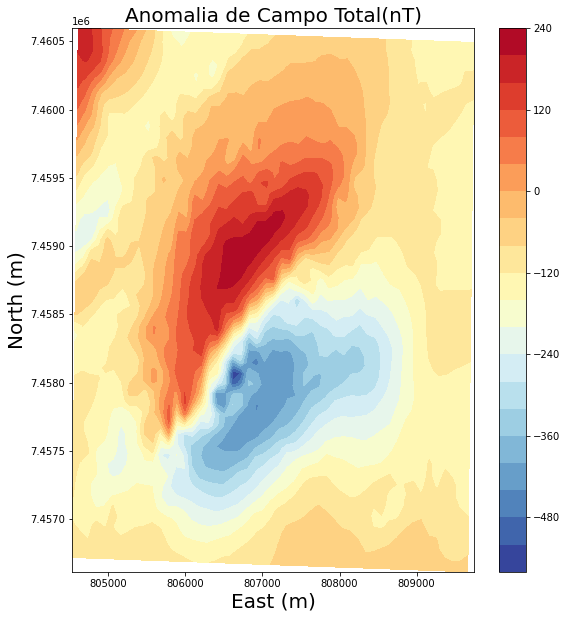

In [4]:
%matplotlib inline
#xs = [x1, x1, x2, x2, x1]
#ys = [y1, y2, y2, y1, y1]

#xs1 = [pointx[0], pointx[0], pointx[5], pointx[5], pointx[0]]

#ys1 = [pointy[0], pointy[5], pointy[5], pointy[0], pointy[0]]

#flechax = [[numpy.absolute(pointx[0] + pointx[5])], [pointx[5]]]
#flechay = [[numpy.absolute(pointy[0] + pointy[5])], [pointy[5]]]


#origin = [[numpy.absolute(pointx[0] + pointx[5])], [[numpy.absolute(pointy[0] + pointy[5])]]]
#ponta = [[pointx[5]], [pointy[5]]]

#print(ponta)

# graficos
plt.close('all')
plt.figure(figsize=(9,10))
#******************************************************
#copia = plt.contour(Y, X, tfa_final, levels = 16, cmap = 'jet', linewidths = 2)
#plt.clabel(copia , inline=2, fontsize=12, colors = 'k')
#plt.set(copia,'LineWidth',[5])
original = plt.contourf(Y, X, anomaly_cubo, 20, cmap = plt.cm.RdYlBu_r)
plt.title('Anomalia de Campo Total(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
#corpo, = plt.plot(ys1,xs1,'k-*', label = 'Extensão do Dique')
#plt.plot(ys2,xs2,'k-')
#plt.plot(ys3,xs3,'m-')
#arrow = plt.arrow(2000.0, 0.0, 4500.0, 0.0, width=250, length_includes_head = True, color = 'k')
#first_legend = plt.legend(handles=[corpo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, corpo], ['Direção de mergulho', 'Extensão do Dique'], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
plt.colorbar()
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()


In [18]:
N = 51 * 51
print(N)

2601


In [6]:
def matrix_Euler(X, dx_act, Y, dy_act, Z, dz_act, eta, tfa_final, N):
    A, B = 0., 0.
    B = np.reshape(X*dx_act + Y*dy_act + Z*dz_act + eta*tfa_final, (N, 1))
    A = np.hstack((np.reshape(dx_act, (N, 1)), 
            np.reshape(dy_act, (N, 1)), 
            np.reshape(dz_act, (N, 1)), 
            np.zeros((N,1)) + eta))
    return A, B

In [7]:
def Euler_calc(X, Y, Z, tfa_final, eta, N):
    
    n = len(eta)
    #Calculo das derivadas espaciais
    delta = np.abs(X[0][0] - X[0][1])*0.1

    dx_act = np.reshape(derivative.my_xderiv(X, Y, tfa_final, n = 1), (51,51))

    dy_act = np.reshape(derivative.my_yderiv(X, Y, tfa_final, n = 1), (51,51))

    dz_act = np.reshape(derivative.my_zderiv(X, Y, tfa_final, n = 1), (51,51))
    
    #Calculo da Deconvolução de Euler
    final_result = np.zeros((4, n))
    for i in range(n):
        A, B = matrix_Euler(X, dx_act, Y, dy_act, Z, dz_act, eta[i], tfa_final, N)
        result = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, B))
        final_result[0, i], final_result[1, i], final_result[2, i], final_result[3, i]  = result[0], result[1], result[2], result[3]
    
    return final_result

In [14]:
eta = [1., 2., 3.]

In [15]:
dx_act = derivative.my_xderiv(X, Y, anomaly_cubo, n = 1)
print(np.shape(dx_act))
print(dx_act)

(2601,)
[-0.14150331 -0.17541097 -0.1762406  ...  2.33594106  2.54635347
  2.68894031]


In [16]:
final_result = Euler_calc(X, Y, Z, anomaly_cubo, eta, N)

In [17]:
print(final_result)

[[ 7.45881054e+06  7.45881054e+06  7.45881054e+06]
 [ 8.06454451e+05  8.06454451e+05  8.06454451e+05]
 [ 8.57668190e+01  2.24908693e+02  3.64050566e+02]
 [-1.05231391e+02 -1.05335486e+02 -1.05370184e+02]]
